In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [15]:
y_train.shape

(34799,)

8

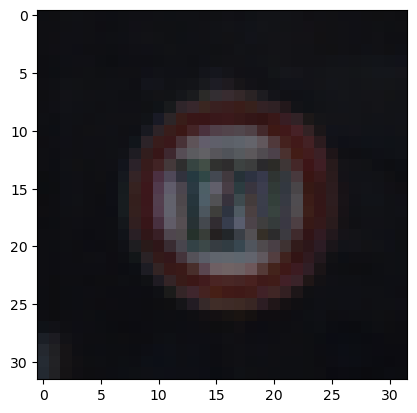

In [12]:
i = 10
plt.imshow(X_train[i])
y_train[i]

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train.shape

(34799, 32, 32, 3)

In [16]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [21]:
X_train_gray

array([[[[ 88.33333333],
         [ 64.33333333],
         [ 62.66666667],
         ...,
         [127.33333333],
         [102.66666667],
         [116.        ]],

        [[ 68.33333333],
         [ 63.        ],
         [ 62.66666667],
         ...,
         [103.33333333],
         [ 94.        ],
         [114.33333333]],

        [[ 78.        ],
         [ 70.        ],
         [ 67.33333333],
         ...,
         [101.        ],
         [ 93.        ],
         [ 91.33333333]],

        ...,

        [[243.33333333],
         [238.        ],
         [230.66666667],
         ...,
         [ 94.66666667],
         [112.33333333],
         [199.        ]],

        [[241.66666667],
         [236.66666667],
         [229.66666667],
         ...,
         [ 85.33333333],
         [ 88.        ],
         [180.33333333]],

        [[231.66666667],
         [228.66666667],
         [227.33333333],
         ...,
         [ 84.66666667],
         [ 82.        ],
         [123.   

In [22]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [23]:
X_train_gray_norm

array([[[[-0.30989583],
         [-0.49739583],
         [-0.51041667],
         ...,
         [-0.00520833],
         [-0.19791667],
         [-0.09375   ]],

        [[-0.46614583],
         [-0.5078125 ],
         [-0.51041667],
         ...,
         [-0.19270833],
         [-0.265625  ],
         [-0.10677083]],

        [[-0.390625  ],
         [-0.453125  ],
         [-0.47395833],
         ...,
         [-0.2109375 ],
         [-0.2734375 ],
         [-0.28645833]],

        ...,

        [[ 0.90104167],
         [ 0.859375  ],
         [ 0.80208333],
         ...,
         [-0.26041667],
         [-0.12239583],
         [ 0.5546875 ]],

        [[ 0.88802083],
         [ 0.84895833],
         [ 0.79427083],
         ...,
         [-0.33333333],
         [-0.3125    ],
         [ 0.40885417]],

        [[ 0.80989583],
         [ 0.78645833],
         [ 0.77604167],
         ...,
         [-0.33854167],
         [-0.359375  ],
         [-0.0390625 ]]],


       [[[-0.046875  ],


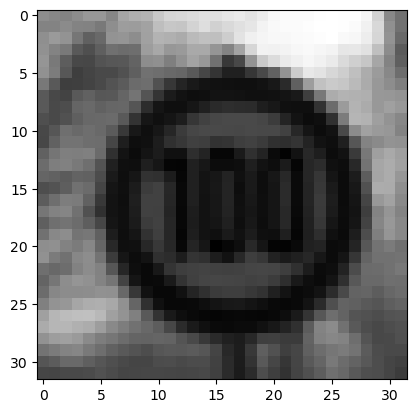

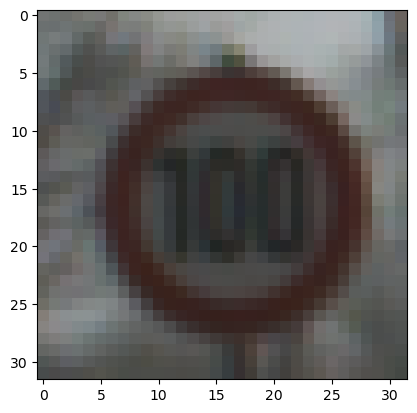

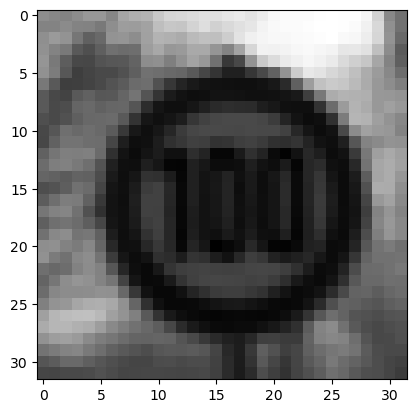

In [30]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [32]:
image_shape = X_train_gray[i].shape
image_shape

(32, 32, 1)

The model consists of the following layers: 

- first layer CNN #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- second CNN layer #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: flatten
    - Flatten the network with Input = 5x5x16 and Output = 400

- fully connected 
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- fully connected
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- fully connected
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [33]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=image_shape))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [34]:
cnn_model

In [35]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [38]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 8s 105ms/step - loss: 3.1523 - accuracy: 0.1776 - val_loss: 2.6929 - val_accuracy: 0.3229
Epoch 2/50
70/70 [==============================] - 7s 99ms/step - loss: 1.7362 - accuracy: 0.5237 - val_loss: 1.4050 - val_accuracy: 0.6186
Epoch 3/50
70/70 [==============================] - 7s 101ms/step - loss: 0.9651 - accuracy: 0.7271 - val_loss: 0.9807 - val_accuracy: 0.7213
Epoch 4/50
70/70 [==============================] - 7s 97ms/step - loss: 0.6827 - accuracy: 0.8081 - val_loss: 0.8161 - val_accuracy: 0.7601
Epoch 5/50
70/70 [==============================] - 7s 95ms/step - loss: 0.5300 - accuracy: 0.8548 - val_loss: 0.7188 - val_accuracy: 0.7955
Epoch 6/50
70/70 [==============================] - 7s 99ms/step - loss: 0.4379 - accuracy: 0.8818 - val_loss: 0.6777 - val_accuracy: 0.8061
Epoch 7/50
70/70 [==============================] - 7s 98ms/step - loss: 0.3782 - accuracy: 0.8983 - val_loss: 0.6075 - val_accuracy: 0.8317
Epoch 8/50


In [42]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=1)
print('Test Accuracy : {:.4f}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.1021 - accuracy: 0.8724
Test Accuracy : 0.8724


In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

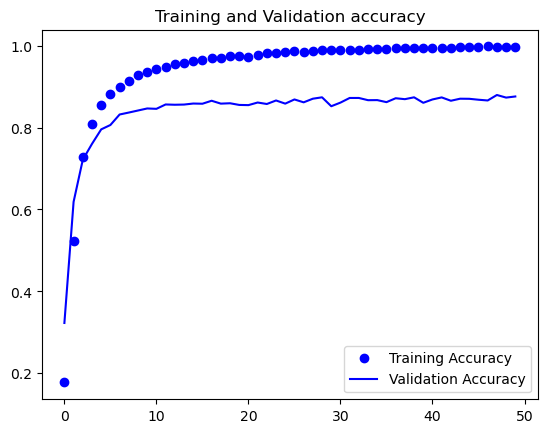

In [45]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

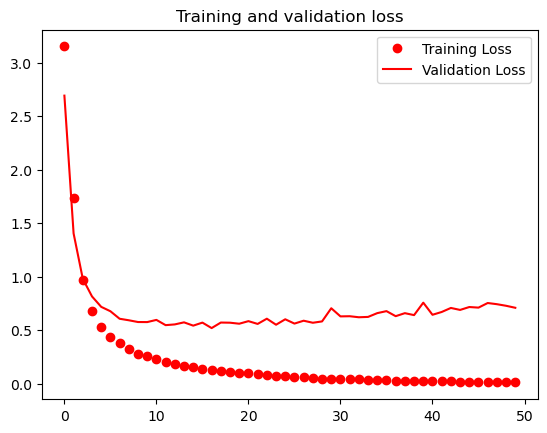

In [48]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
predicted_classes = cnn_model.predict(X_test_gray_norm)
y_true = y_test

395/395 [==============================] - 1s 3ms/step


In [51]:
y_true

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [56]:
classes_x=np.argmax(predicted_classes,axis=1).astype("uint8")

In [57]:
classes_x

array([16,  1, 38, ..., 32,  7, 10], dtype=uint8)

<Axes: >

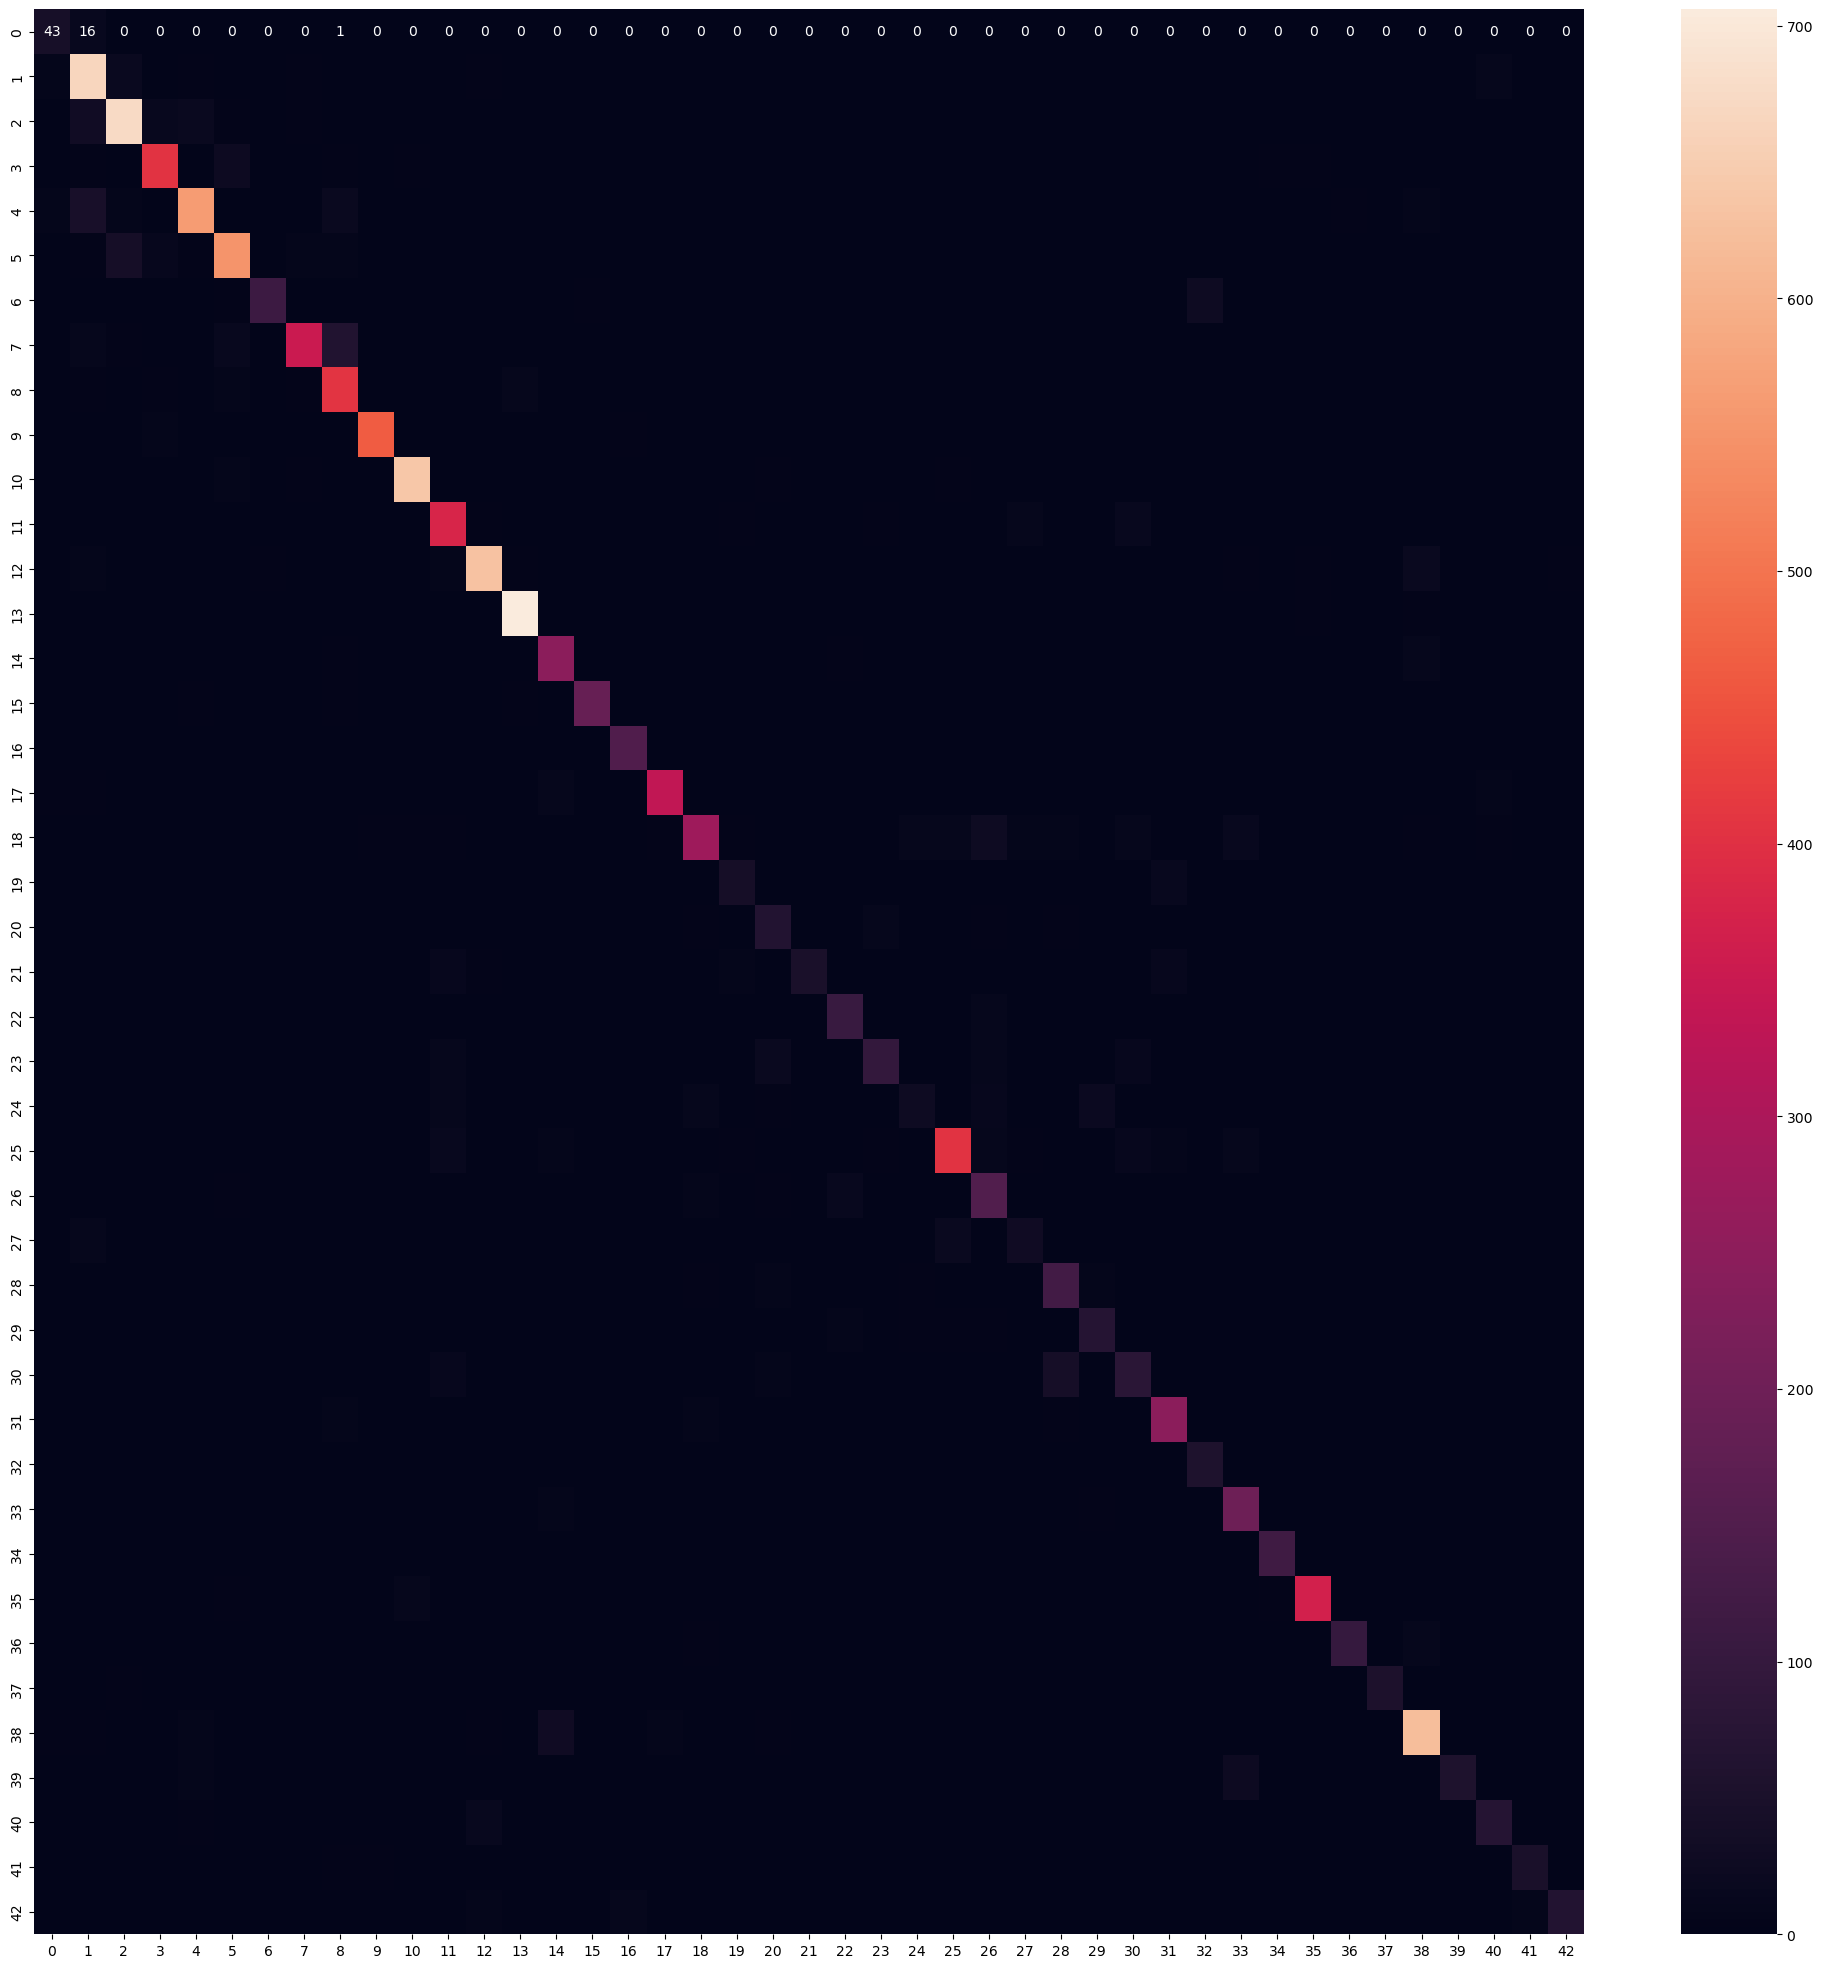

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, classes_x)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

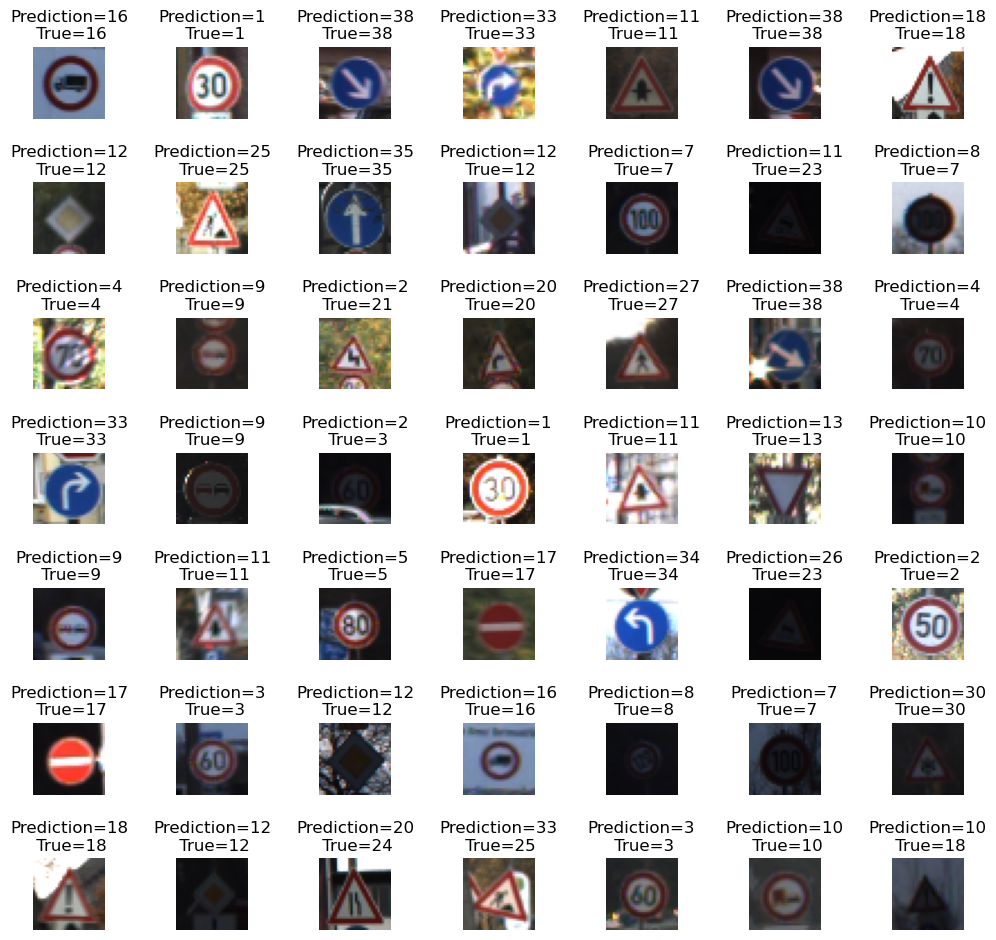

In [60]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(classes_x[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)